# Text Clustering Assignment by:
- Yusri Al-Sanaani
- Hetvi Soni
- Tavleen Kour
- Immanuella Iyawe

Group: Group: DSA_202101_ 7

---
### Import the required libraries
---

# **Data Preparation**

In this assignemnt, we’ll cluster text data into different categories. 
- First download the some books from gutenberg to create a dataset.
- The dataset consists of five different books for different authors.
- The genres of the books can be categorized into 5 categories:
 - Metaphysical Thriller
 - Children's Literature
 - Poetry
 - Epic poetry,Christian Mythology
 - Romance Novel
- For most part, we’ll ignore the labels but we’ll use them while evaluating the trained model since many of the evaluation metrics need the “true” labels.
 


---
# Import some books
---

In [3]:
nltk.download('gutenberg')
book1 = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
#book2 = nltk.corpus.gutenberg.raw('carroll-alice.txt')
book2 = nltk.corpus.gutenberg.raw('edgeworth-parents.txt')
book3 = nltk.corpus.gutenberg.raw('whitman-leaves.txt')
book4 = nltk.corpus.gutenberg.raw('milton-paradise.txt')
book5 = nltk.corpus.gutenberg.raw('austen-sense.txt')
# Create a list of books
books=[book1,book2,book3,book4,book5]

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [4]:
genres=['Metaphysical Thriller', "Children's Literature",
        'Poetry','Epic poetry,Christian Mythology','Romance Novel']

## Extract the books titles and authors names using regex

In [5]:
# Extract the books_titles and authors_names by creating a regex pattern 
# that match book title, author name, and year of publication:
def titles_authors(books):
    books_authors_names=[]
    for book in books:
        la=re.findall("(\[[ a-zA-Z0-9 '_.+-|\]+ by [ a-zA-Z0-9-]+|\.[ a-zA-Z0-9-.]+\])", book)
        books_authors_names.append(''.join(la[0]))
        # Now, we can remove special characters, numbers,and right/left white space
        # to get only the book title and author name:
    clean_books_authors_names=[]
    for i in range(len(books_authors_names)):
        clean_names=re.sub(r'[\d+\\!"#$%&()*+,-./:;?@[\]^_`{|}~]',' ',books_authors_names[i]).strip() 
        split_names=re.split('by',clean_names)
        clean_books_authors_names.append(split_names)
    return books_authors_names,clean_books_authors_names

In [6]:
# Create book_names list and authors_labels list

def title_author(clean_books_authors_names):
    def list_split(lst):
        return lst[:(len(lst)//2)], lst[(len(lst)//2):]
    books_names=[]
    authors_names=[]
    for i in range(len(clean_books_authors_names)):
        book, author = list_split(clean_books_authors_names[i])
        books_names.append(''.join(book).strip())
        authors_names.append(''.join(author).strip())
    # Create an automatic list for authors last name:
    authors_labels=[]
    for i in range(len(authors_names)):
        authors_labels.append(authors_names[i].split()[-1])
    return books_names,authors_labels

In [7]:
# books_authors_names before cleaning
books_authors_names,clean_books_authors_names=titles_authors(books)
#print('The book title, author name, and year of publication:')
#books_authors_names

In [8]:
# books_authors_names after cleaning
#clean_books_authors_names

In [9]:
# we need list of books titles and authors
books_titles,authors=title_author(clean_books_authors_names)
# list of books titles
#books_titles

In [10]:
# also we need a list of authors ['Chesterton','Carroll','Whitman','Milton','Bryant']
#authors

In [11]:
# Display the books and the curresponding authors
books_authors=pd.DataFrame({'Book Title':books_titles, 'Authors':authors,'Genres':genres},index=[1,2,3,4,5])
books_authors

,Book Title,Authors,Genres
1,The Man Who Was Thursday,Chesterton,Metaphysical Thriller
2,The Parent's Assistant,Edgeworth,Children's Literature
3,Leaves of Grass,Whitman,Poetry
4,Paradise Lost,Milton,"Epic poetry,Christian Mythology"
5,Sense and Sensibility,Austen,Romance Novel


# Create a general function to clean the data of multiple books
This function takes list of books as input and returns a list of cleaned books. The cleaning includes:

- Removing multiple spaces and left/right white spaces.
- Conevrting capital characters to lower case
- Removing special characters
- Removing single character word

## Clean the data of multiple books

In [12]:
def get_clean_text(textbooks_data):
    cleaned_books=[]
    for book in textbooks_data:
        single_lower= re.sub(r'\s+',' ',book).lower() # Multiple space removal and conevrt to lower case
        #clean_text = re.sub(r'[\\!"#$%&()*+,-./:;?@[\]^_`{|}~]',' ',single_lower).strip() # Remove special characters
        clean_text = re.sub('[^a-zA-Z]',' ', single_lower)
        #clean_text = re.sub(r"\s+[a-zA-Z]\s+", ' ', clean_text) # remove single character word
        cleaned_books.append(clean_text)
    return cleaned_books

In [13]:
cleaned_books=get_clean_text(books)

## Defining a function to partition multiple books (get_chunks() function):
- This function takes dict as input  that contains the labels (books and authors names) and books content.
- It returns a list of partitioned books with labeling each partition to the book it belongs to.

## Partition multiple books

In [14]:
# partitioning the text data with auto labeling 
def get_chunks(chunk_books_dict):
    import nltk
    nltk.download('punkt')
    chunk_books=[]
    chunk_books_labels=[]
    for label,book in chunk_books_dict.items():
        #splits = book.split()
        tokenized_word=nltk.word_tokenize(book)
        labeled_chunks=[]
        chunks_labels=[]
        for i in range(0,len(tokenized_word),150):
            #labeled_chunks.append((' '.join(tokenized_word[i:150+i]),label))
            labeled_chunks.append(' '.join(tokenized_word[i:150+i]))
            chunks_labels.append(label)
        chunk_books.append(labeled_chunks)
        chunk_books_labels.append(chunks_labels)
    return chunk_books,chunk_books_labels

In [15]:
# uncleaned books books
uncleaned_chunk_books_dict={}
for i,book in enumerate(books):
    uncleaned_chunk_books_dict[authors[i]]=book
chunk_books1,chunk_books_labels1=get_chunks(uncleaned_chunk_books_dict)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
#chunk_books_dict1=dict(zip(authors_labels,cleaned_books))
chunk_books_dict={}
for i,book in enumerate(cleaned_books):
    chunk_books_dict[authors[i]]=book
chunk_books,chunk_books_labels=get_chunks(chunk_books_dict)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
# Check if each book contains enough text data to ensure getting 200 chunks
for i,book in enumerate(chunk_books):
    if len(book)<200:
        print('The book # {} does not contain enough text data (it has only {} chunks).'.format(i+1,len(book)))
    else:
        print("The book # {} contains {} chunks.".format(i+1,len(book)))

The book # 1 contains 392 chunks.
The book # 2 contains 1139 chunks.
The book # 3 contains 843 chunks.
The book # 4 contains 537 chunks.
The book # 5 contains 806 chunks.


## Creating random samples of 200 partitions for each book
Defining a function to return 200 random chunks for each book(get_random_chunks function):
- This function takes a list of previously partioned books as input.
- It returns a list of books conataining 200 random chunks each.

In [18]:

def get_random_chunks(chunk_books):
    import random
    random.seed(1)
    random_chunks=[]
    for book in chunk_books:
        chunks=random.sample(book, 200)
        random_chunks.append(chunks)
    return random_chunks

## Creating random samples of 200 partitions for each book

In [19]:
books_random_chunks_uncleaned=get_random_chunks(chunk_books1)
books_random_chunks=get_random_chunks(chunk_books)
#print(random_chunks[0][0],'\n\n',random_chunks[1][0])
# Check if each book contains enough text data to ensure getting 200 chunks
for i,book in enumerate(books_random_chunks):
    print("The book # {} contains {} chunks.".format(i+1,len(book)))

The book # 1 contains 200 chunks.
The book # 2 contains 200 chunks.
The book # 3 contains 200 chunks.
The book # 4 contains 200 chunks.
The book # 5 contains 200 chunks.


## Create data frame

In [20]:
# Uncleaned dataframe
df_books1=pd.DataFrame()
for i in range(len(books_random_chunks)):
    dfs=pd.DataFrame({'Book Text Data':books_random_chunks_uncleaned[i],'Author':chunk_books_labels1[i][:200]})
    df_books1=df_books1.append(dfs)

df_books1.reset_index(drop=True,inplace=True)
df_books1.sample(5)

,Book Text Data,Author
58,"sat with his mighty chin upon his hand , and g...",Chesterton
554,"on the ship 's deck give a kiss in return , We...",Whitman
666,", When reason hath to deal with force , yet so...",Milton
640,"thus far , and overlay , With this portentous ...",Milton
697,was Godhead from her thought . Greedily she in...,Milton


# **Feature Engineering**

## Clean the text

In [21]:
# Cleaned text
df_books=pd.DataFrame()
for i in range(len(books_random_chunks)):
    dfs=pd.DataFrame({'books_text_data':books_random_chunks[i],'authors_labels':chunk_books_labels[i][:200]})
    df_books=df_books.append(dfs)
df_books.reset_index(drop=True,inplace=True)
df_books.sample(5)

,books_text_data,authors_labels
326,and runners the cavalcade was brought up by he...,Edgeworth
724,immediate in a flame but soon obscured with sm...,Milton
251,knew had usually a great effect even at thirte...,Edgeworth
681,garden grows eat freely with glad heart fear h...,Milton
158,we have called a meeting this very evening to ...,Chesterton


In [22]:
frames=dict(('Book {}'.format(i+1),book) for i, book in enumerate(books_random_chunks))
books_frames=pd.DataFrame(frames)
books_frames.sample(5)

,Book 1,Book 2,Book 3,Book 4,Book 5
28,be as prosaic as your poetry the rare strange ...,taken of this honest man in both cases i shall...,cargoes nor machinery vehicles trade nor reven...,how camest thou speakable of mute and how to m...,companions and colonel brandon immediately aft...
9,up the professor made no answer but gazed in f...,no more say no more i am the happiest man miss...,limbs bending standing astride the beams drivi...,intellectual more i shun and strength of coura...,or resentment now however his good natured hon...
83,life itself their own as much as other people ...,downright certain sure of it the shilling was ...,life s unflinching ones forth from their strug...,descending from the thrones above those happy ...,of good fortune he therefore replied without a...
170,the great poisoning princes of the renaissance...,bursal can you inform me why joe my groom does...,oratorios of beethoven handel or haydn the cre...,was his shape and lovely never since of serpen...,of the happiest women in the world elinor coul...
162,and walked across the room talking rapidly as ...,your money when you went to bed old m please y...,work done camping awhile in clusters of mighty...,taste to please true appetite and not disrelis...,the hand to discompose you so much if it was o...


## Stop words removal

In [23]:
# remove Stopwords
def remove_stopwords(books_text_data):
    nltk.download('stopwords')
    stop_words = nltk.corpus.stopwords.words("english")
    splited_text=books_text_data.str.split()
    text_no_stopwords=[]
    for i in range(len(splited_text)):
        text_no_stopwords1 = [word for word in splited_text[i] if word not in stop_words]
        text_no_stopwords.append(' '.join(text_no_stopwords1))
    return text_no_stopwords

In [24]:
a=remove_stopwords(df_books['books_text_data'])
df_books['text_no_stopwords']=a; df_books.sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,books_text_data,authors_labels,text_no_stopwords
294,of the baskets stood a little in the way of th...,Edgeworth,baskets stood little way entrance man pushing ...
779,orbs the sun that light imparts to all receive...,Milton,orbs sun light imparts receives alimental reco...
804,felt no doubt of its being a reciprocal enjoym...,Austen,felt doubt reciprocal enjoyment suggested surp...
701,under a shade on flowers much wondering where ...,Milton,shade flowers much wondering whence thither br...
459,now cease is it because if you continued beyon...,Whitman,cease continued beyond swift moment would soon...


## Lemmatization and Stemming

In [25]:
# Lemmatisation (convert the word into root word)
def lemmatisation(books_text_data):
    nltk.download('wordnet')
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    splited_text=books_text_data.str.split()
    lemmatized_words=[]
    for i in range(len(splited_text)):
        lemmatized_words1 =' '.join([lem.lemmatize(word) for word in splited_text[i]])
        lemmatized_words.append(lemmatized_words1)
    return lemmatized_words

#Stemming
def stem_word(books_text_data):
    ps=nltk.stem.porter.PorterStemmer()
    splited_text=books_text_data.str.split()
    stem_words=[]
    for i in range(len(splited_text)):
        stem_words1 =' '.join([ps.stem(word) for word in splited_text[i]])
        stem_words.append(stem_words1)
    return stem_words

In [26]:
b=lemmatisation(df_books['books_text_data'])
df_books['lemmatized_text']=b; df_books.sample(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,books_text_data,authors_labels,text_no_stopwords,lemmatized_text
16,speak to renard said the professor we can not ...,Chesterton,speak renard said professor leave among beasts...,speak to renard said the professor we can not ...
465,volumes of sound merely i am moved by the exqu...,Whitman,volumes sound merely moved exquisite meanings ...,volume of sound merely i am moved by the exqui...
88,he realised into what rich roads the carriage ...,Chesterton,realised rich roads carriage carrying saw pass...,he realised into what rich road the carriage w...
690,europe with asia joined and scourged with many...,Milton,europe asia joined scourged many stroke indign...,europe with asia joined and scourged with many...
181,of hurry but they were really moving wonderful...,Chesterton,hurry really moving wonderfully fast like well...,of hurry but they were really moving wonderful...


In [27]:
bb=lemmatisation(df_books['text_no_stopwords'])
df_books['lemm_nostopwords_text']=bb; df_books.sample(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,books_text_data,authors_labels,text_no_stopwords,lemmatized_text,lemm_nostopwords_text
362,your money when you went to bed old m please y...,Edgeworth,money went bed old please worship always put a...,your money when you went to bed old m please y...,money went bed old please worship always put a...
8,beetles barking said syme furiously snails bar...,Chesterton,beetles barking said syme furiously snails bar...,beetle barking said syme furiously snail barki...,beetle barking said syme furiously snail barki...
391,ll give you a taste of the law my good sir or ...,Edgeworth,give taste law good sir mistaken forgot flaw l...,ll give you a taste of the law my good sir or ...,give taste law good sir mistaken forgot flaw l...
253,once frederick sings after much preluding viol...,Edgeworth,frederick sings much preluding violante pantry...,once frederick sings after much preluding viol...,frederick sings much preluding violante pantry...
924,enable you to as might be more than a temporar...,Austen,enable might temporary accommodation short mig...,enable you to a might be more than a temporary...,enable might temporary accommodation short mig...


In [28]:
c=stem_word(df_books['books_text_data'])
df_books['stem_text']=c; df_books.sample(5)

,books_text_data,authors_labels,text_no_stopwords,lemmatized_text,lemm_nostopwords_text,stem_text
350,and parties were almost unknown at dr middleto...,Edgeworth,parties almost unknown dr middleton brought id...,and party were almost unknown at dr middleton ...,party almost unknown dr middleton brought idea...,and parti were almost unknown at dr middleton ...
607,in this uttermost distress my only strength an...,Milton,uttermost distress strength stay forlorn thee ...,in this uttermost distress my only strength an...,uttermost distress strength stay forlorn thee ...,in thi uttermost distress my onli strength and...
594,life without a friend a lover near i know very...,Whitman,life without friend lover near know well could...,life without a friend a lover near i know very...,life without friend lover near know well could...,life without a friend a lover near i know veri...
325,let her come in and take her guinea hen barbar...,Edgeworth,let come take guinea hen barbara instant refle...,let her come in and take her guinea hen barbar...,let come take guinea hen barbara instant refle...,let her come in and take her guinea hen barbar...
634,was seen most glorious in him all his father s...,Milton,seen glorious father shone substantially expre...,wa seen most glorious in him all his father sh...,seen glorious father shone substantially expre...,wa seen most gloriou in him all hi father shon...


In [29]:
#df_books[['books_text_data','authors_labels']]

In [30]:
#print(str(ss.iloc[0][0]))
#print(str(df_books.iloc[0][0]))



## Labels encoding

In [31]:
# Encode the authors labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels_encoder=le.fit_transform(df_books['authors_labels'])
#print(labels_encoder)
#print(list(le.classes_))
#print(list(le.inverse_transform(labels_encoder)))
#print(list(le.inverse_transform(le.classes_)))
#print(list(le.inverse_transform([0,1,2,3,4]))) # decode the labels to get the orginal labels

In [32]:
df_books.insert(loc=2, column='labels_encoder',value=labels_encoder) # insert the encoded labels to the dataframe

In [33]:
df_books.sample(5)

,books_text_data,authors_labels,labels_encoder,text_no_stopwords,lemmatized_text,lemm_nostopwords_text,stem_text
541,surrounded by myriads of small craft i forget ...,Whitman,4,surrounded myriads small craft forget sing com...,surrounded by myriad of small craft i forget n...,surrounded myriad small craft forget sing come...,surround by myriad of small craft i forget not...
429,provided for upon the earth appearing at inter...,Whitman,4,provided upon earth appearing intervals dear d...,provided for upon the earth appearing at inter...,provided upon earth appearing interval dear dr...,provid for upon the earth appear at interv how...
307,do no more than buy her another can i said she...,Edgeworth,2,buy another said appealing companions sure sai...,do no more than buy her another can i said she...,buy another said appealing companion sure said...,do no more than buy her anoth can i said she a...
173,the lobster syme tasted it and found it partic...,Chesterton,1,lobster syme tasted found particularly good su...,the lobster syme tasted it and found it partic...,lobster syme tasted found particularly good su...,the lobster syme tast it and found it particul...
983,well as everybody else who was likely to prove...,Austen,0,well everybody else likely prove acquaintance ...,well a everybody else who wa likely to prove a...,well everybody else likely prove acquaintance ...,well as everybodi els who wa like to prove an ...


In [34]:
x=df_books['lemm_nostopwords_text']
y=df_books['labels_encoder']

## **Feature Extraction**
We will use TF_iDf, BOW, word immeoding, and LDA to extract the features of our dataset.

**Tf-IDF Model**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFiDF = TfidfVectorizer() # I have reduce the # of features to 200 to reduce the runtime
TF_iDF = TFiDF.fit_transform(x).toarray()

In [36]:
#TFiDF Transformation
# Parameter election
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_range = (1,2); min_df = 10; max_df = 1.
#; max_features = 300
# max_features=max_features
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        norm='l2',
                        sublinear_tf=True)
TFiDF= tfidf.fit_transform(x).toarray()
TFiDF.shape

(1000, 1398)

**BOW Model**

In [37]:
#Transformation to bag of words
from sklearn.feature_extraction.text import CountVectorizer
BOW= CountVectorizer().fit_transform(x).toarray()

**LDA Model**

In [38]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=20,learning_method='online',random_state=0,n_jobs=-1)
lda_output=lda_model.fit_transform(TF_iDF)
print(lda_output)

[[0.00625146 0.00625146 0.00625146 ... 0.00625146 0.00625146 0.00625146]
 [0.00600203 0.00600203 0.00600203 ... 0.00600203 0.00600203 0.00600203]
 [0.00572391 0.00572391 0.00572391 ... 0.00572391 0.00572391 0.00572391]
 ...
 [0.0064831  0.0064831  0.0064831  ... 0.0064831  0.0064831  0.0064831 ]
 [0.0057515  0.0057515  0.0057515  ... 0.0057515  0.0057515  0.0057515 ]
 [0.00562544 0.00562544 0.00562544 ... 0.00562544 0.00562544 0.00562544]]


**Word Embedding**

In [39]:
from gensim.models import Word2Vec
books_text = x.values
textVec = [nltk.word_tokenize(text) for text in books_text]
#continuous bag of words
cbow_model = Word2Vec(textVec)
#skip-gram
sg_model = Word2Vec(textVec,sg=1)

## PCA and t-SNE Decomposition Plots

To take a look over the features distribution, we will use PCA and TSNE to reduce the dimension into 2 dimensions before plotting (transform high dimensional features into 2 dimensions) since the the dimension of obtained features is large.
From the plots below we can see that the features seems to be scattered all around and overlapping as well.

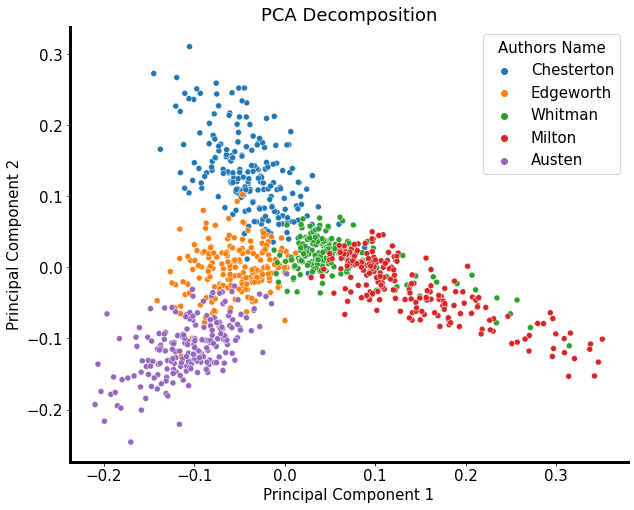

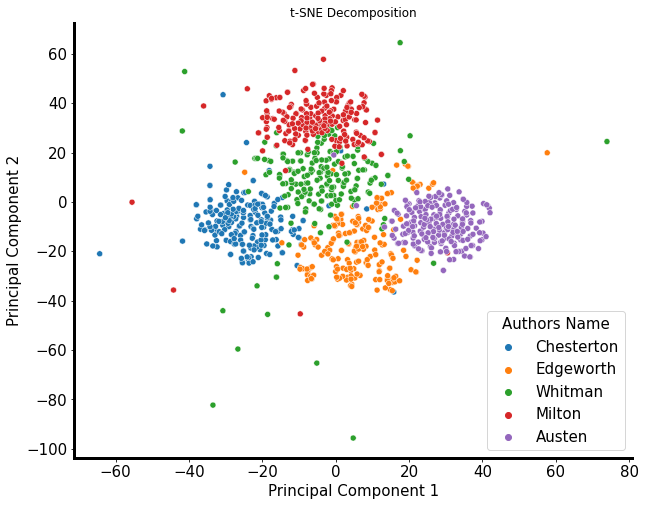

In [85]:
# different type of preprocessing are used to check the effect of stemming, stop words, lemmatization text represenation
x=df_books['lemm_nostopwords_text']
#x=df_books['books_text_data']
#x=df_books['stem_text']
#x=df_books['lemmatized_text']
#x=df_books['text_no_stopwords']
y=df_books['labels_encoder']
import seaborn as sns
#text_train = tfidf_matrix.toarray()
#text_train=df_books_train_tfid
text_labels = y
from sklearn.decomposition import PCA
principal_components = PCA(n_components=2).fit_transform(TF_iDF) # Fit and transform
df_PCA = pd.DataFrame(principal_components, columns=['Principal Component 1', 'Principal Component 2'])
df_PCA['Authors Labels']=y
df_PCA['Authors Name']=le.inverse_transform(y)

plt.figure(figsize=(10,8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue="Authors Name",
                data=df_PCA).set_title('PCA Decomposition')
#--------------
from sklearn.manifold import TSNE
principal_components = TSNE(n_components=2).fit_transform(TF_iDF) # Fit and transform
df_TSNE = pd.DataFrame(principal_components, columns=['Principal Component 1', 'Principal Component 2'])
df_TSNE['Authors Labels']=y
df_TSNE['Authors Name']=le.inverse_transform(y)

plt.figure(figsize=(10,8))
b=sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue="Authors Name",
                data=df_TSNE).set_title('t-SNE Decomposition', fontsize = 12)
#sns.set(font_scale=1.4)

------------------
# **Kmeans Model**


**Modelling K-Means**


In [86]:
def k_means(vector,n):
  from sklearn.cluster import KMeans
  km_model = KMeans(n_clusters=n).fit(vector)
  kmeans_labels = km_model.labels_
  y_predicted = km_model.fit_predict(vector)
  cluster_center=km_model.cluster_centers_
  return kmeans_labels,y_predicted,cluster_center

**PCA Implemenatation**

To reduce the high dimentional vectors into 2 dimentions.

In [87]:
def pca(vector):
  from sklearn.decomposition import PCA
  pca_trans = PCA(n_components=2).fit_transform(vector)
  PCA_components = pd.DataFrame(data = pca_trans)
  return pca_trans,PCA_components

**Get the Features**

Obtain the features from reduced dimentional vectors:


In [132]:
pca_bow,PCA_components_bow=pca(BOW)
pca_tfidf,PCA_components_tfidf=pca(TF_iDF)
pca_lda,PCA_components_lda=pca(lda_output)
#pca_WE,PCA_components_WE=pca(sg_model.wv.vectors)
pca_WE,PCA_components_WE=pca(cbow_model.wv.vectors)

**Implemen Elbow Method**


In [89]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(PCA_components_bow.iloc[:,:4])
    wcss.append(kmeans.inertia_)

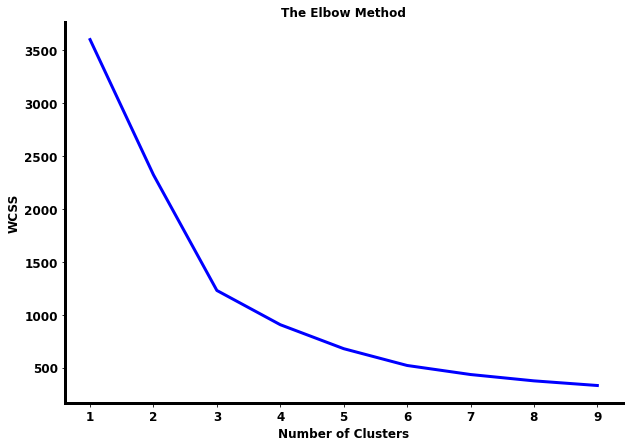

In [90]:
plt.figure(figsize=(10, 7))
plt.plot(range(1,10),wcss,'b-',lw=3.0)
plt.title('The Elbow Method',fontsize = 12,fontweight='bold')
plt.xlabel('Number of Clusters',fontsize = 12,fontweight='bold')
plt.ylabel('WCSS',fontsize = 12,fontweight='bold')
#plt.show()
import matplotlib as mpl
mpl.rcParams["axes.spines.right"] = False; mpl.rcParams["axes.spines.top"] = False
from pylab import *
rc('axes', linewidth=3)
fontsize = 12
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.show()

As shown in figure above, there is a siginficant bending at 3 and there slight bendings at 4 and 5. Therefore, we will run kmeans with 3-5 clusters and compare the results.


**Function for Metrics calculation**

In [91]:
# Clustering Metrics calculation
def clustering_metrics(labels,clusters,vector,model):
  from sklearn import metrics
  kappa=metrics.cohen_kappa_score(labels, clusters,weights='linear')
  cluster_silhouette=metrics.silhouette_score(vector, clusters, metric='euclidean')
  human_silhouette=metrics.silhouette_score(vector,labels,metric='euclidean')
  homogeneity=metrics.homogeneity_score(labels, clusters)
  completeness=metrics.completeness_score(labels, clusters)
  v_meas=metrics.v_measure_score(labels, clusters)
  ARI=metrics.adjusted_rand_score(labels, clusters)
  AMI=metrics.adjusted_mutual_info_score(labels,clusters)
  cluster_metrics=pd.DataFrame({'kappa':kappa,'cluster_silhouette':cluster_silhouette,
                              'human_silhouette':human_silhouette, 'homogeneity':homogeneity,
                              'completeness':completeness,'v_meas':v_meas,
                             'ARI':ARI,'AMI':AMI},index=[model])
  return cluster_metrics

In [ ]:
def k_means(vector,n):
  from sklearn.cluster import KMeans
  km_model = KMeans(n_clusters=n).fit(vector)
  clusters = km_model.labels_
  y_predicted = km_model.fit_predict(vector)
  cluster_center=km_model.cluster_centers_
  return clusters,y_predicted,cluster_center

In [ ]:
Km_BOW_metrics=clustering_metrics(y,clusters,PCA_components_bow,'BOW')
clusters,y_predicted,cluster_center=k_means(PCA_components_bow,5)
Km_visualize(clusters,PCA_components_bow,y_predicted,cluster_center)
Km_BOW_metrics



**Function to visualize the clusters**


In [92]:
# Adding the data to a dataframe in order to visualize it on a scatter plot.
def Km_visualize(clusters,PCA_components,y_predicted,cluster_center):
  # We now plot the results found from k-means clustering algorithm on a scatter plot.
  filtered_label0 = PCA_components[y_predicted == 0]
  filtered_label1 = PCA_components[y_predicted == 1]
  filtered_label2 = PCA_components[y_predicted == 2]
  filtered_label3 = PCA_components[y_predicted == 3]
  filtered_label4 = PCA_components[y_predicted == 4]

  plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , s = 50)
  plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , s = 50)
  plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , s = 50)
  plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1] , s = 50)
  plt.scatter(filtered_label4.iloc[:,0] , filtered_label4.iloc[:,1] , s = 50)
  plt.scatter(cluster_center[:,0],cluster_center[:,1],marker='x',s=150,c='k',label='Centroids')
  fig = plt.gcf()
  fig.set_size_inches(15, 8)
  plt.figure()

**Function for silhouette visualization**


In [93]:
def silhouette_vis(PCA_components):
  from sklearn.metrics import silhouette_score,silhouette_samples
  from matplotlib import cm
  for clusters in [3,4,5]:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    clusterer = KMeans(n_clusters=clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(PCA_components)
    silhouette_avg = silhouette_score(PCA_components, cluster_labels)
    print('The average silhouette score = {} for {} clusters'.format(silhouette_avg,clusters))

    sample_silhouette_values = silhouette_samples(PCA_components, cluster_labels)

    y_lower = 10
    for i in range(clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("Silhouette Visualization",fontsize = 12,fontweight='bold')
    ax1.set_xlabel("Silhouette Coefficient",fontsize = 12,fontweight='bold')
    ax1.set_ylabel("Cluster Label",fontsize = 12,fontweight='bold')

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / clusters)
    ax2.scatter(PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Clusters Visualization",fontsize = 12,fontweight='bold')
    ax2.set_xlabel("PC1",fontsize = 12,fontweight='bold')
    ax2.set_ylabel("PC2",fontsize = 12,fontweight='bold')
    plt.suptitle(("Silhouette analysis for KMeans with clusters = %d" % clusters),fontsize=14, fontweight='bold')
    plt.show()

**Kmeans Model using BOW**

In [94]:
clusters,y_predicted,cluster_center=k_means(PCA_components_bow,5)

In [95]:
Km_BOW_metrics=clustering_metrics(y,clusters,PCA_components_bow,'BOW')
Km_BOW_metrics

,kappa,cluster_silhouette,human_silhouette,homogeneity,completeness,v_meas,ARI,AMI
BOW,-0.320021,0.435738,0.116773,0.438433,0.500065,0.467225,0.355854,0.464358


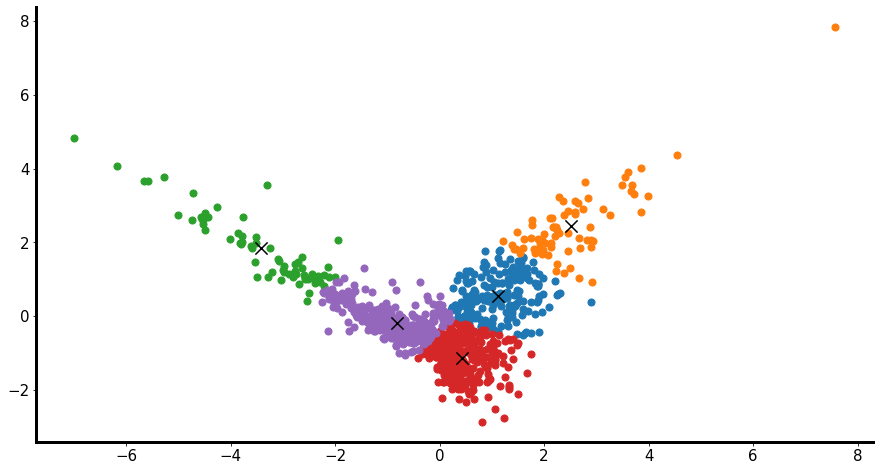

<Figure size 432x288 with 0 Axes>

In [96]:
Km_visualize(clusters,PCA_components_bow,y_predicted,cluster_center)

In [97]:
# Check if clustering result is close to the human labels:
df_data=pd.DataFrame({'Authors':df_books['authors_labels'],
                  'Authors_Labels':df_books['labels_encoder'],
                  'Cluster_Labels': clusters})
df_data.sample(5)

,Authors,Authors_Labels,Cluster_Labels
59,Chesterton,1,0
624,Milton,3,1
577,Whitman,4,1
189,Chesterton,1,1
420,Whitman,4,1


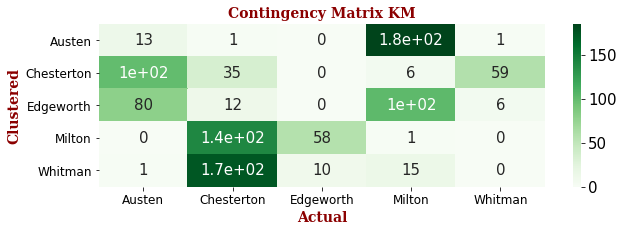

In [98]:
df_data['Cluster_Labels'].value_counts()
cont_matrix(y,clusters)

In [99]:
def cont_matrix(y,clusters):
  from sklearn.metrics.cluster import contingency_matrix
  labels_df = df_books[['authors_labels', 'labels_encoder']].drop_duplicates().sort_values('labels_encoder')
  font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 14}
  KM_contingency_matrix=contingency_matrix(y, clusters)
  plt.figure(figsize=(10,3))
  sns.heatmap(KM_contingency_matrix, 
            annot=True,
            xticklabels=labels_df['authors_labels'].values, 
            yticklabels=labels_df['authors_labels'].values,
            cmap="Greens")
  plt.ylabel('Clustered',fontdict=font)
  plt.xlabel('Actual',fontdict=font)
  plt.title('Contingency Matrix KM',fontdict=font)
  plt.xticks(fontsize=12);plt.yticks(fontsize=12)
  plt.show()

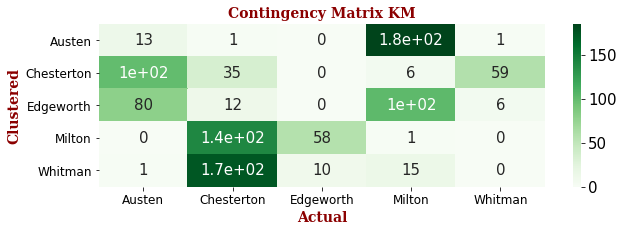

In [100]:
cont_matrix(y,clusters)

The average silhouette score = 0.5187341780210274 for 3 clusters


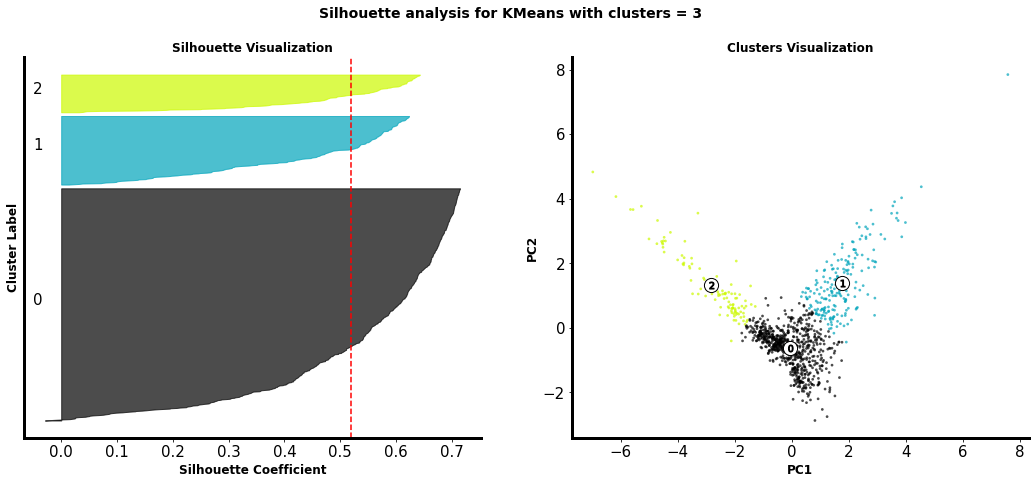

The average silhouette score = 0.4210573582190043 for 4 clusters


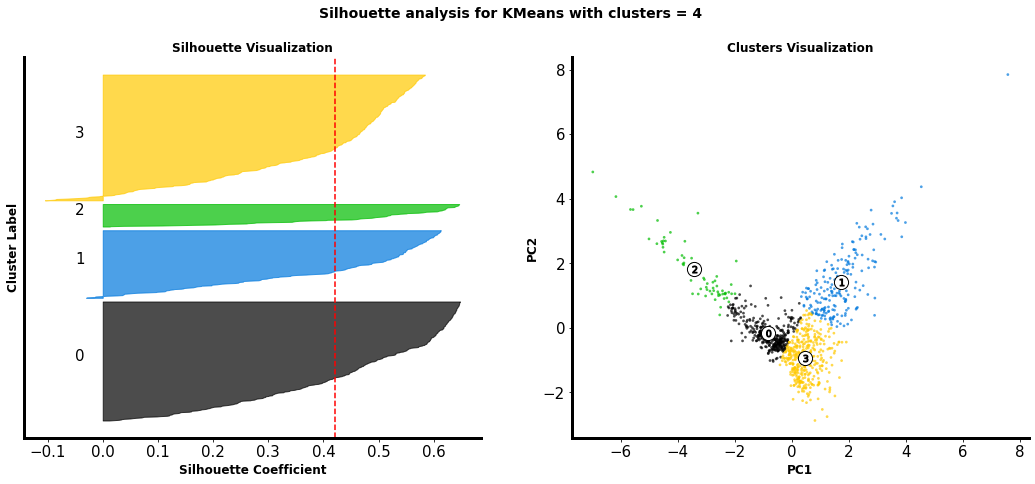

The average silhouette score = 0.4350841852768642 for 5 clusters


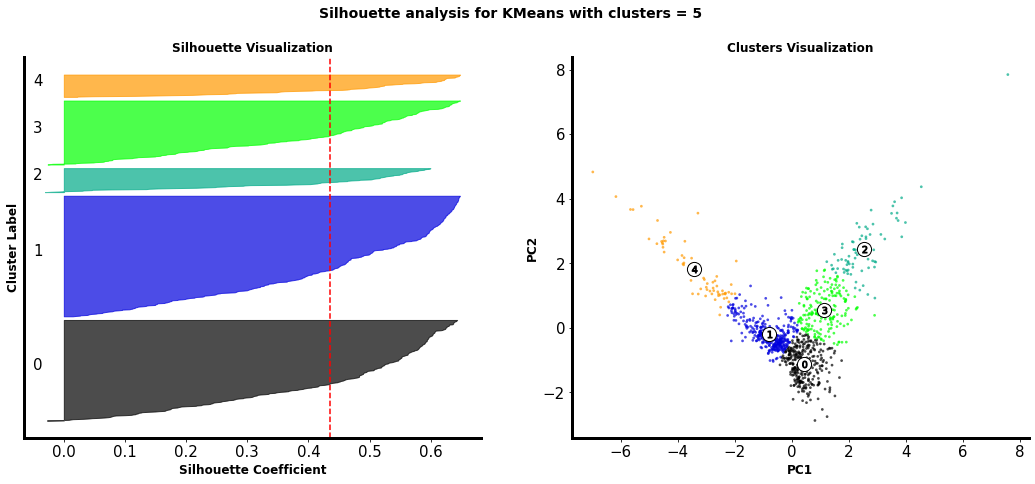

In [101]:
silhouette_vis(PCA_components=PCA_components_bow)

**Kmeans Model using TF-iDF**


In [102]:
clusters,y_predicted,cluster_center=k_means(PCA_components_tfidf,5)

In [103]:
Km_TFiDF_metrics=clustering_metrics(y,clusters,PCA_components_tfidf,'TF-iDF')
Km_TFiDF_metrics

,kappa,cluster_silhouette,human_silhouette,homogeneity,completeness,v_meas,ARI,AMI
TF-iDF,-0.374592,0.478038,0.305856,0.656588,0.682516,0.669301,0.592212,0.667605


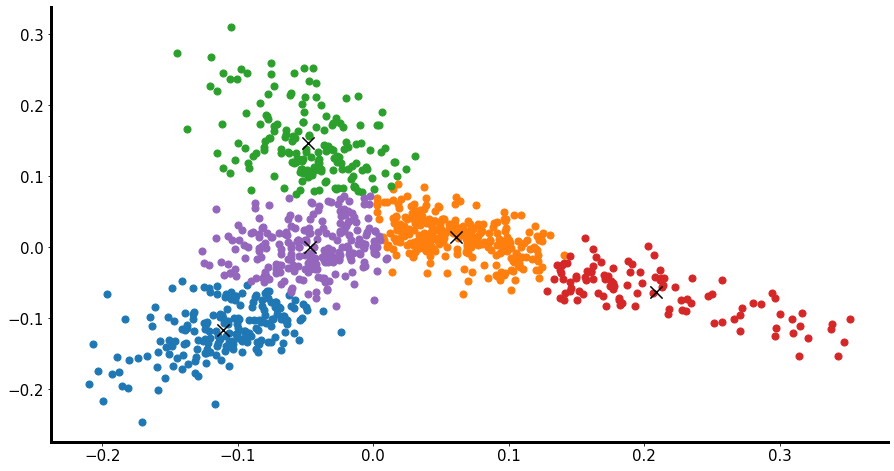

<Figure size 432x288 with 0 Axes>

In [104]:
Km_visualize(clusters,PCA_components_tfidf,y_predicted,cluster_center)

In [105]:
# Check if clustering result is close to the human labels:
df_data=pd.DataFrame({'Authors':df_books['authors_labels'],
                  'Authors_Labels':df_books['labels_encoder'],
                  'Cluster_Labels': clusters})
df_data.sample(5)

,Authors,Authors_Labels,Cluster_Labels
61,Chesterton,1,3
524,Whitman,4,2
404,Whitman,4,2
762,Milton,3,1
989,Austen,0,4


In [106]:
df_data['Cluster_Labels'].value_counts()

2    309
0    234
4    191
3    164
1    102
Name: Cluster_Labels, dtype: int64

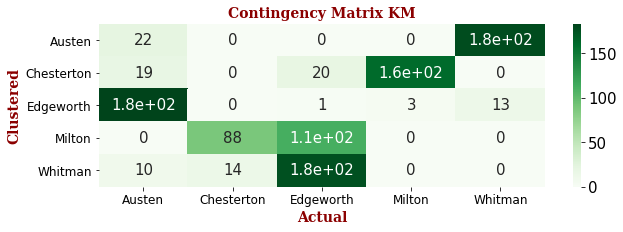

In [107]:
cont_matrix(y,clusters)

The average silhouette score = 0.433619472119904 for 3 clusters


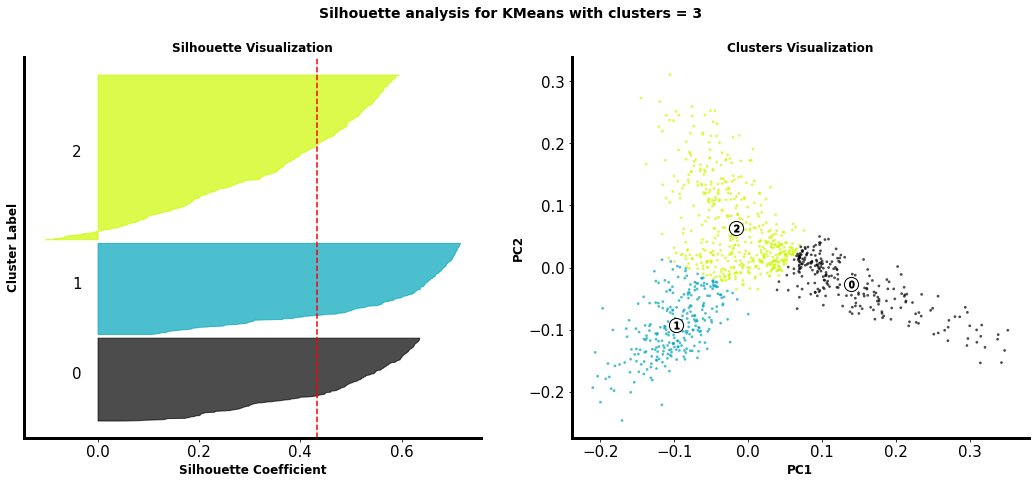

The average silhouette score = 0.482520070343345 for 4 clusters


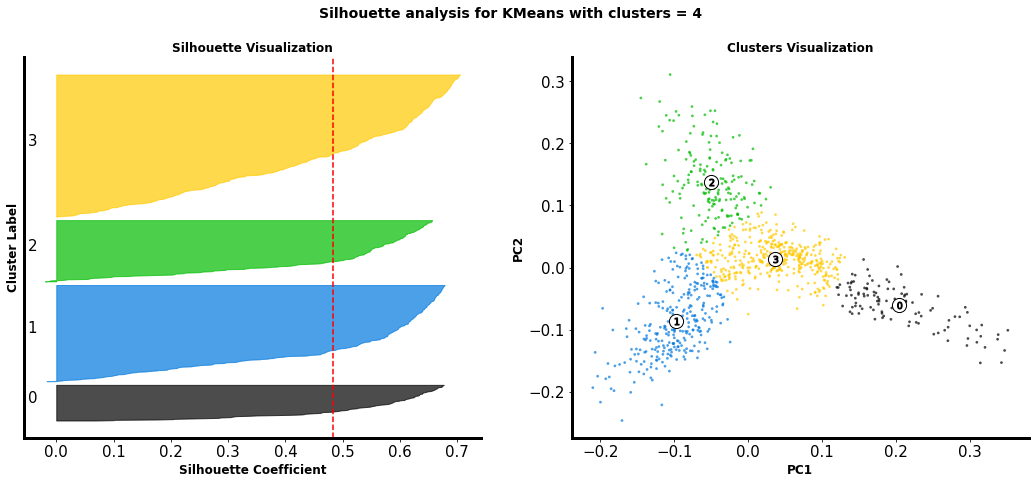

The average silhouette score = 0.47803814330891703 for 5 clusters


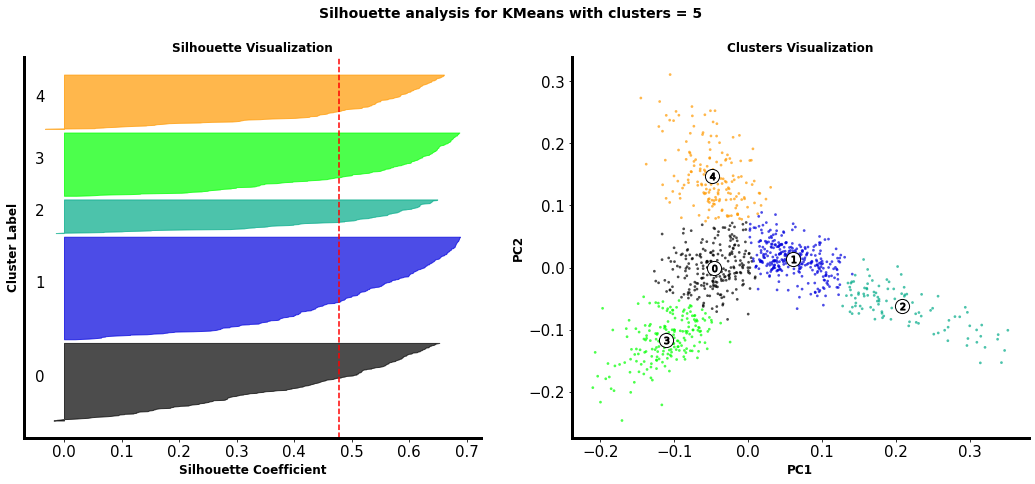

In [108]:
silhouette_vis(PCA_components=PCA_components_tfidf)

**Kmeans Model using LDA**


In [109]:
clusters,y_predicted,cluster_center=k_means(PCA_components_lda,5)

In [110]:
Km_LDA_metrics=clustering_metrics(y,clusters,PCA_components_lda,'LDA')
Km_LDA_metrics

,kappa,cluster_silhouette,human_silhouette,homogeneity,completeness,v_meas,ARI,AMI
LDA,-0.003746,0.574544,-0.186475,0.085884,0.188427,0.117989,0.063988,0.111112


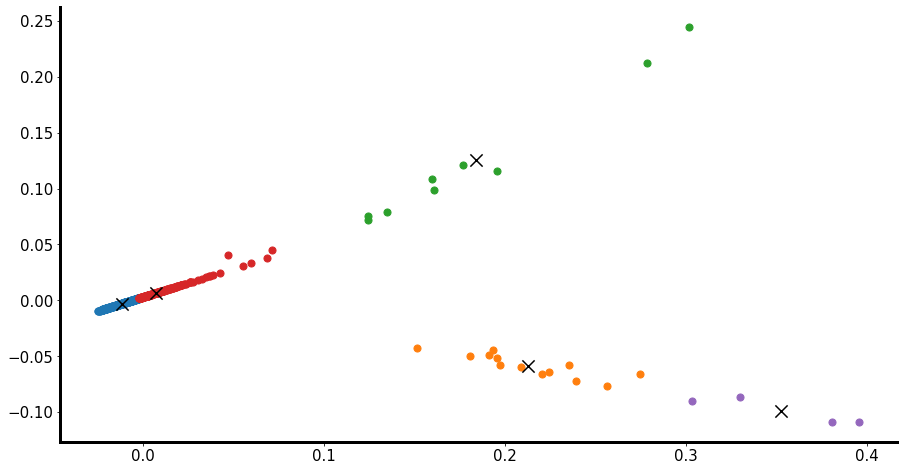

<Figure size 432x288 with 0 Axes>

In [111]:
Km_visualize(clusters,PCA_components_lda,y_predicted,cluster_center)

In [112]:
# Check if clustering result is close to the human labels:
df_data=pd.DataFrame({'Authors':df_books['authors_labels'],
                  'Authors_Labels':df_books['labels_encoder'],
                  'Cluster_Labels': clusters})
df_data.sample(5)

,Authors,Authors_Labels,Cluster_Labels
722,Milton,3,0
192,Chesterton,1,0
967,Austen,0,0
369,Edgeworth,2,3
679,Milton,3,0


In [113]:
df_data['Cluster_Labels'].value_counts()

0    691
3    283
1     13
2      9
4      4
Name: Cluster_Labels, dtype: int64

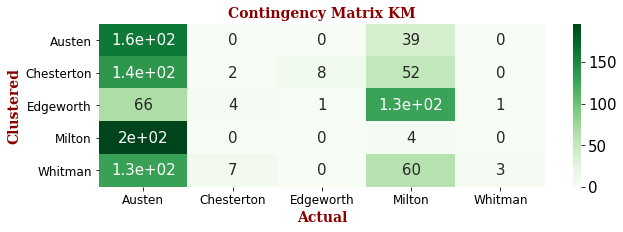

In [114]:
cont_matrix(y,clusters)

The average silhouette score = 0.9304888430634237 for 3 clusters


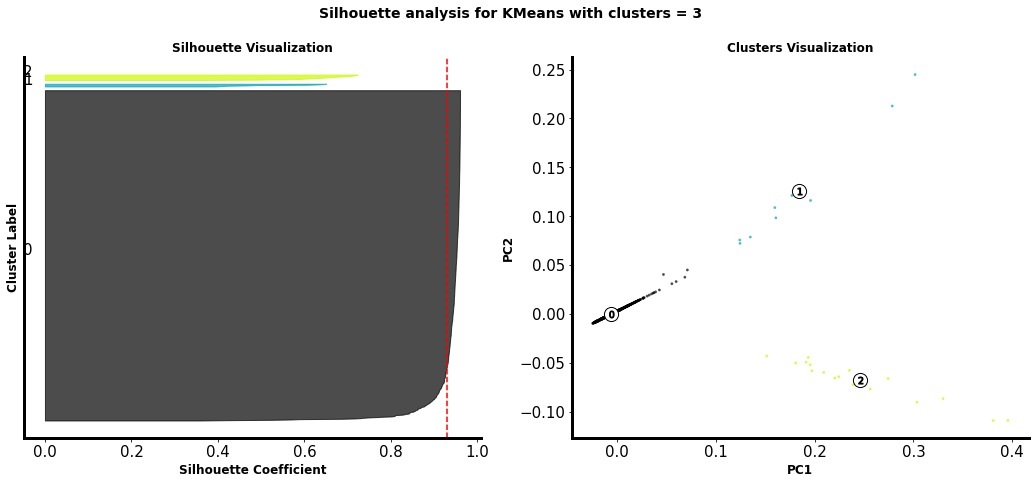

The average silhouette score = 0.5734637711332988 for 4 clusters


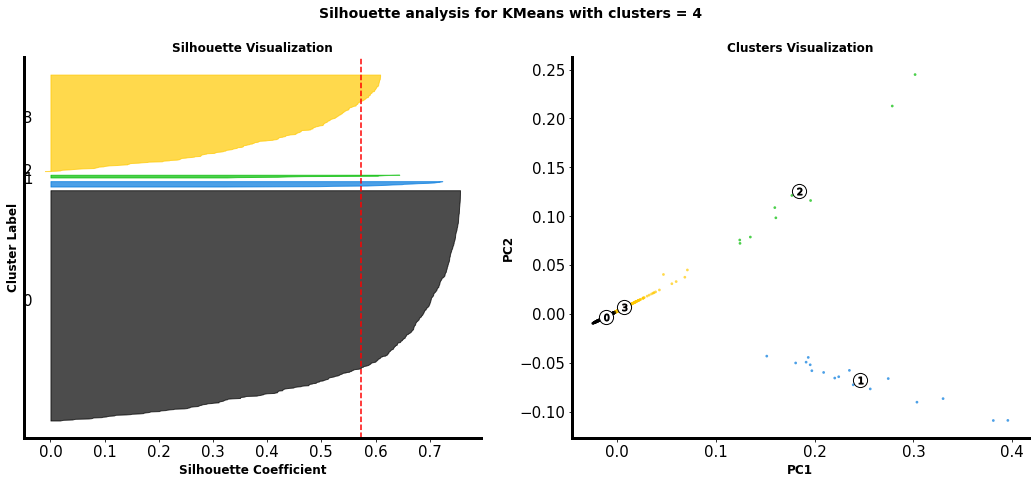

The average silhouette score = 0.5737390079330952 for 5 clusters


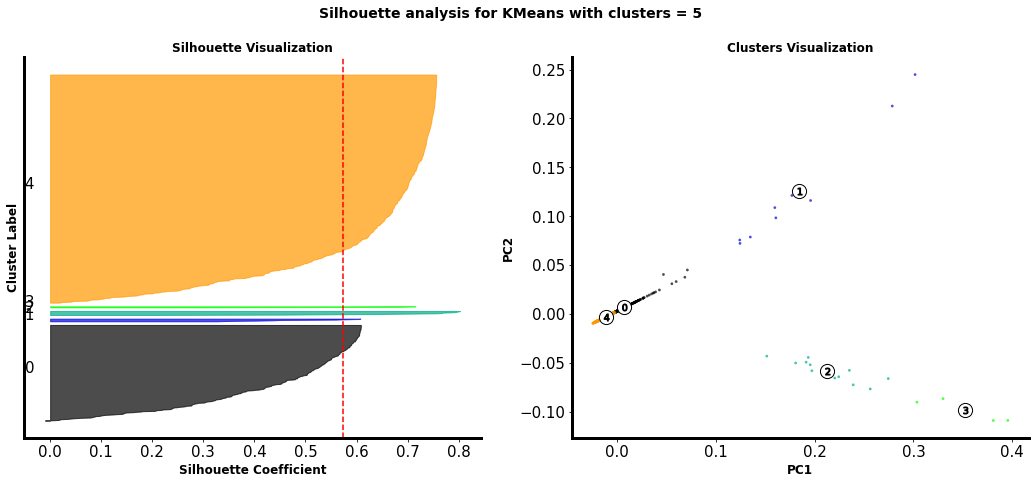

In [115]:
silhouette_vis(PCA_components=PCA_components_lda)

**Kmean Model using-WE**

In [133]:
clusters,y_predicted,cluster_center=k_means(PCA_components_WE,5)

In [135]:
from sklearn import metrics
kappa_WE=metrics.cohen_kappa_score(y, clusters[:1000],weights='linear')
WE_cluster_silhouette=metrics.silhouette_score(PCA_components_WE, clusters, metric='euclidean')
print('The cluster silhouette using WE = {}'.format(WE_cluster_silhouette))
model='WE'
Km_WE_metrics=pd.DataFrame({'kappa':'--','cluster_silhouette':[WE_cluster_silhouette],
                              'human_silhouette':'--', 'homogeneity':'--',
                              'completeness':'--','v_meas':'--',
                             'ARI':'--','AMI':'--'},index=[model])

The cluster silhouette using WE = 0.6051768064498901


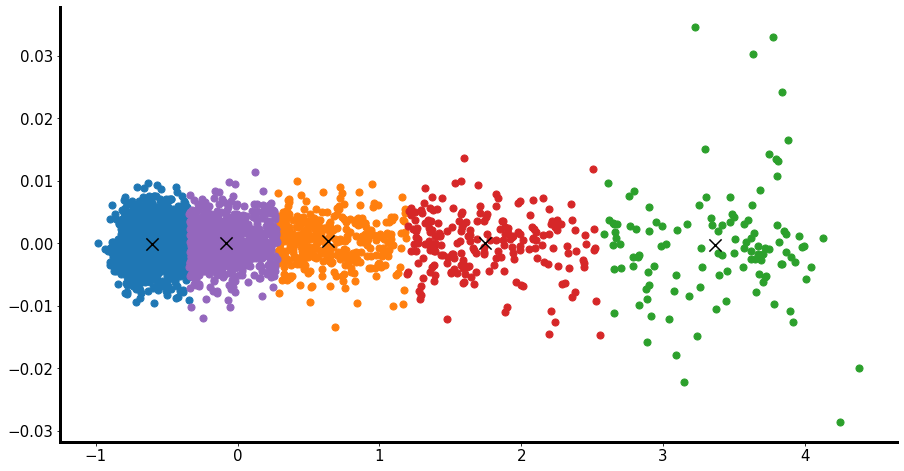

<Figure size 432x288 with 0 Axes>

In [136]:
Km_visualize(clusters,PCA_components_WE,y_predicted,cluster_center)

In [137]:
Km_metrics=[Km_BOW_metrics,Km_TFiDF_metrics,Km_LDA_metrics,Km_WE_metrics]
df_summary = pd.DataFrame()
for df in Km_metrics:
  df_summary=df_summary.append(df)
df_summary

,kappa,cluster_silhouette,human_silhouette,homogeneity,completeness,v_meas,ARI,AMI
BOW,-0.320021,0.435738,0.116773,0.438433,0.500065,0.467225,0.355854,0.464358
TF-iDF,-0.374592,0.478038,0.305856,0.656588,0.682516,0.669301,0.592212,0.667605
LDA,-0.00374614,0.574544,-0.186475,0.0858841,0.188427,0.117989,0.0639885,0.111112
WE,--,0.605177,--,--,--,--,--,--


In [145]:
df_summary.to_excel("KM.xlsx", index=True)
#df_books1.to_csv('students.csv', index=False)
#filename = '/content/output.xlsx'
#df2 = pd.read_excel(filename)
# Load car loan data from a csv file
#filename = '/content/students.csv'
#df3 = pd.read_csv(filename)

In [139]:
df_summary.sort_values('cluster_silhouette', ascending=True)

,kappa,cluster_silhouette,human_silhouette,homogeneity,completeness,v_meas,ARI,AMI
BOW,-0.320021,0.435738,0.116773,0.438433,0.500065,0.467225,0.355854,0.464358
TF-iDF,-0.374592,0.478038,0.305856,0.656588,0.682516,0.669301,0.592212,0.667605
LDA,-0.00374614,0.574544,-0.186475,0.0858841,0.188427,0.117989,0.0639885,0.111112
WE,--,0.605177,--,--,--,--,--,--


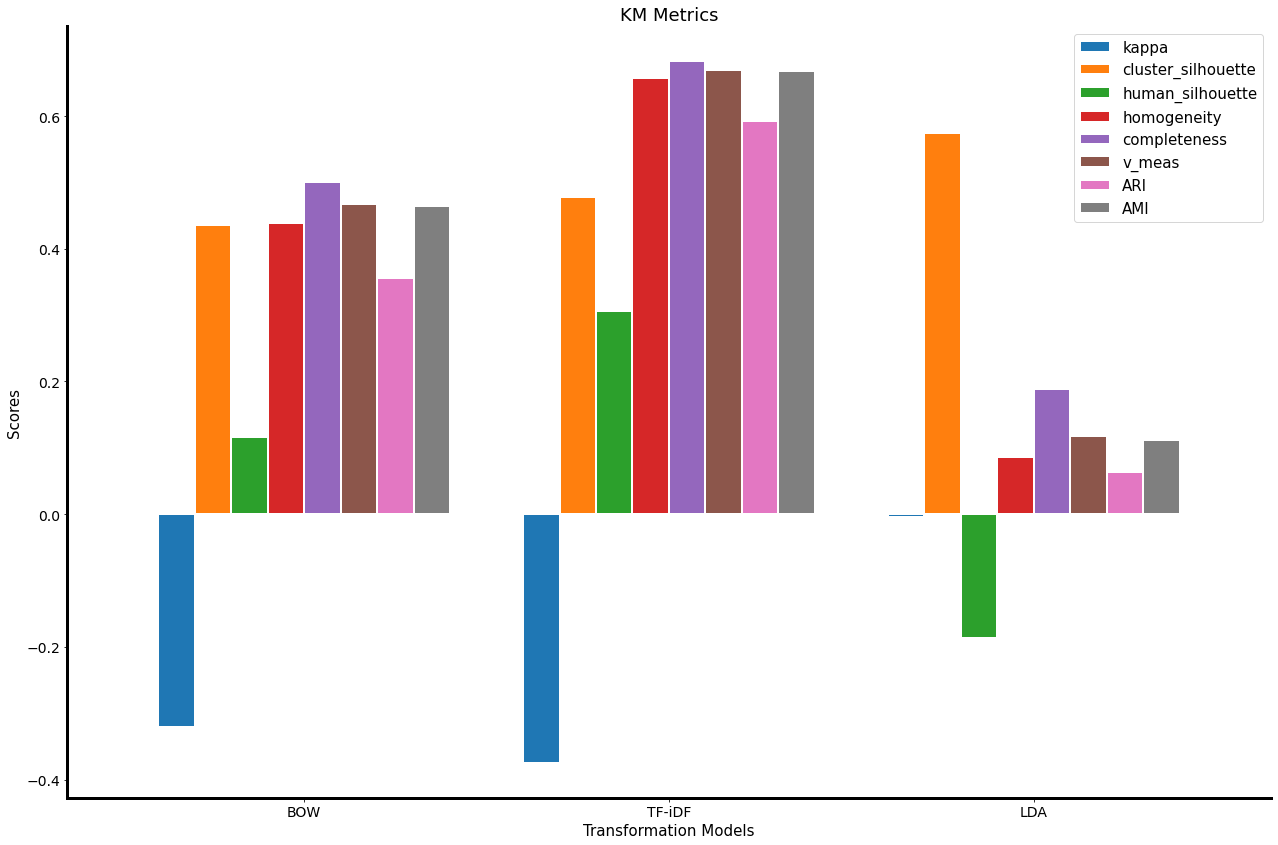

In [140]:
vis_df1=df_summary[:3]
vis_df1
ax = vis_df1.plot.bar(fontsize=14, xlabel='Transformation Models', ylabel='Scores', width=0.8,rot=0,figsize=(18,12),
                      title="KM Metrics",alpha=1,
                      edgecolor='white', linewidth=2)
plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}     
plot.rcParams.update(params)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

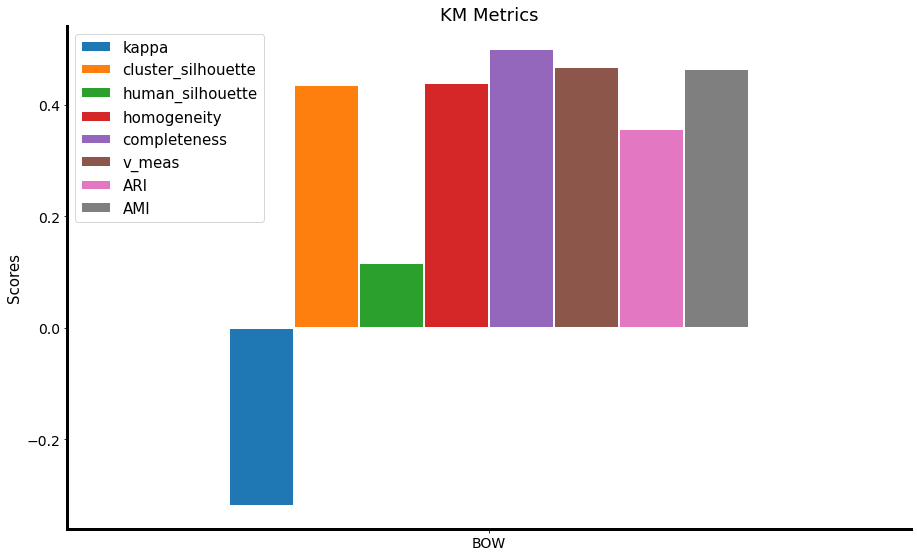

In [141]:
vis_df1=df_summary[:1]
vis_df1
ax = vis_df1.plot.bar(fontsize=14, ylabel='Scores',
                      width=0.8,rot=0,figsize=(13,8),
                      title="KM Metrics",alpha=1,edgecolor='white', linewidth=2)
plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

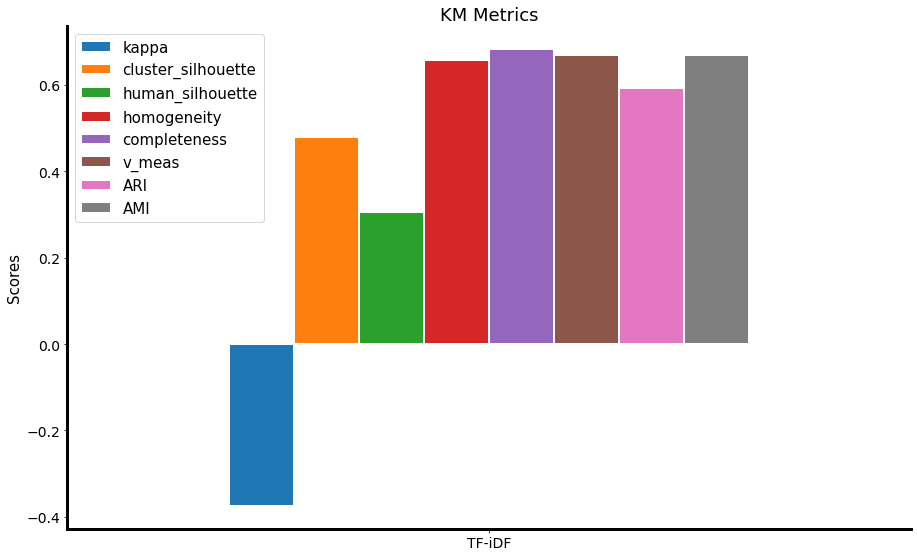

In [142]:
vis_df1=df_summary[1:2]
vis_df1
ax = vis_df1.plot.bar(fontsize=14, ylabel='Scores',width=0.8,
                      rot=0,figsize=(13,8),title="KM Metrics",alpha=1,edgecolor='white', linewidth=2)
plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

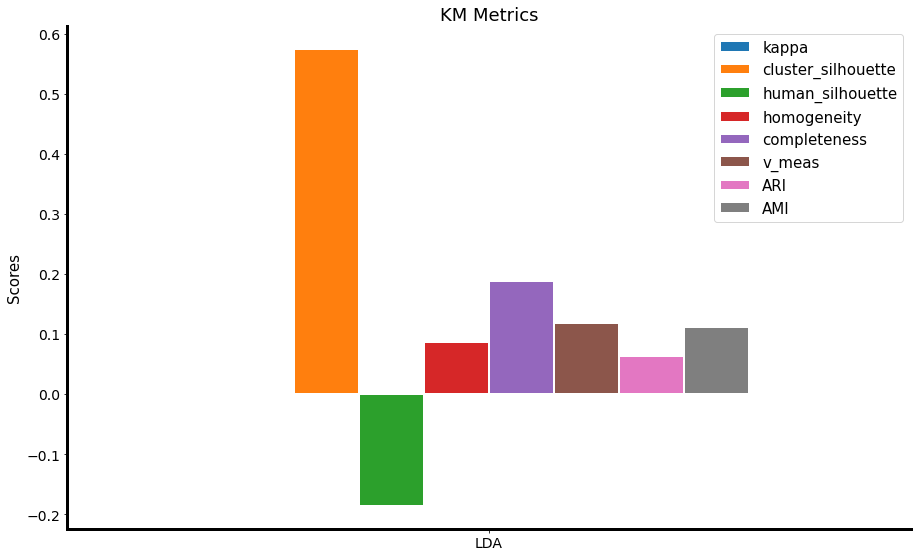

In [143]:
vis_df1=df_summary[2:3]
vis_df1
ax = vis_df1.plot.bar(fontsize=14, ylabel='Scores',
                      width=0.8,rot=0,figsize=(13,8),title="KM Metrics",alpha=1,edgecolor='white', linewidth=2)
plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

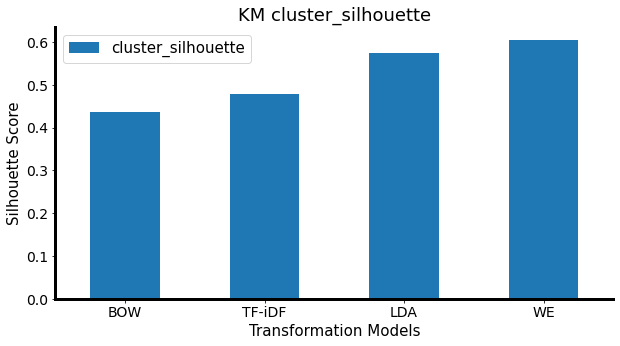

In [144]:
vis_df=df_summary[['cluster_silhouette']]
vis_df
ax = vis_df.plot.bar(fontsize=14, xlabel='Transformation Models', ylabel='Silhouette Score',rot=0,figsize=(10,5),title="KM cluster_silhouette",legend=True)